# Simple Linear regression
- Linear regression builds a model which establishes a relationship between features and targets.
- In this Lab, the feature was house size and the target was house price.
- The model has two parameters and whose values are 'fit' using training data.
- once a model's parameters have been determined, the model can be used to make predictions on novel data.
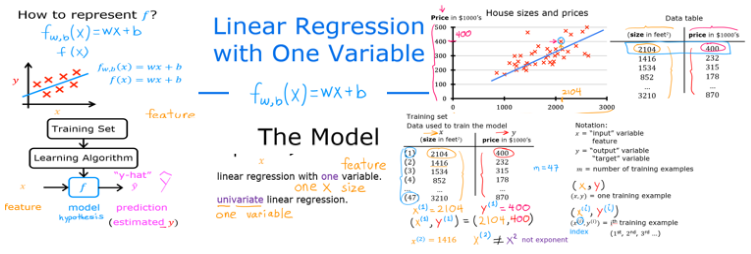

## Goals
- Implement the model $f_{w,b}$ for linear regression with one variable

## Notation

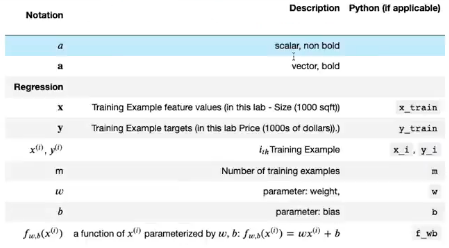

## Libraries
- <strong>NumPy:</strong> for scientific computing
- <strong>Matplotlib:</strong> for plotting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# Problem Statement

- we will use a simple data set with only 2 data points:<br>
a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.<br>
These two points will constitute our *data or training set*.<br> 
the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

we would like to fit a linear regression model through these two points, so we can then predict price for other houses - say, a house with 1200 sqft.


Create our `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [2]:
# x_train: the input variable (size in 1000 square feet)
# y_train: the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**Note**: we will utilize the python 'f-string' output formatting described [here](https://docs.python.org/3/tutorial/inputoutput.html) when printing.<br> The content between the curly braces is evaluated when producing the output.

### Number of training examples `m`
we will use `m` to denote the number of training examples.<br>
Numpy arrays have a `.shape` parameter.<br>
`x_train.shape` returns a python tuple with an entry for each dimension.<br>
`x_train.shape[0]` is the length of the array and number of examples as shown below.

In [3]:
# m: the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


we can also use the Python `len()` function as shown below.

In [4]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`

we will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example.<br>
Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0).<br> 

In [5]:
# (x^0, y^0)

i = 0 

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


In [6]:
# (x^1, y^1)

i = 1
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (2.0, 500.0)


### Plotting the data

we can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display.

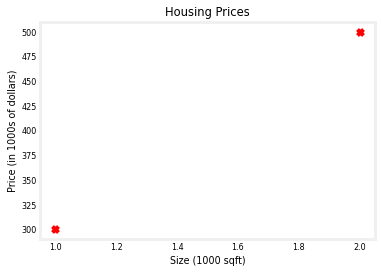

In [7]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

## Model function

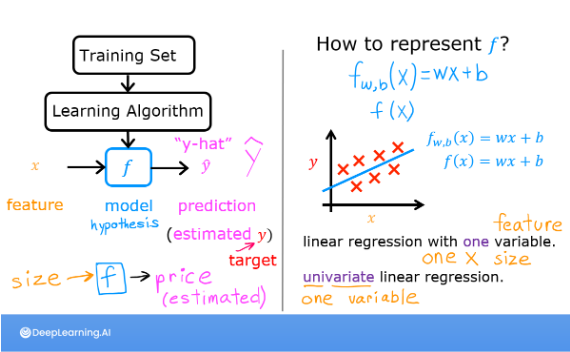<br>
The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $$
This formula is how we can represent straight lines.<br> 
Different values of $w$ and $b$ give us different straight lines on the plot. <br/> <br/> 

Let's start with $w = 100$ and $b = 100$. 

In [8]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for our two data points. we can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, we can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**:
> - `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). <br>
> - `(scalar)` describes an argument without dimensions, just a magnitude.  
> - `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [9]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

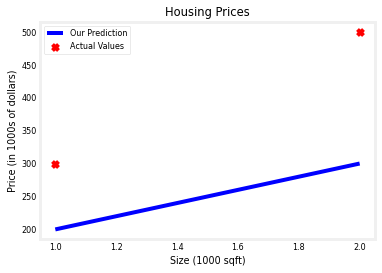

In [10]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As we can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

### Challenge
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

<details>
<summary>
    <font size='3', color='darkgreen'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

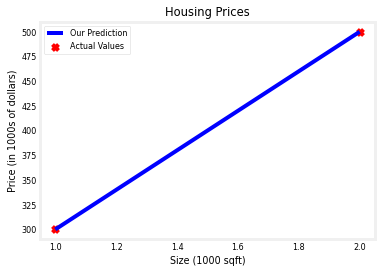

In [11]:
w = 200
b = 100



def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb



tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

### Prediction
Now that we have a model, we can use it to make our original prediction.<br>
Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [12]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars
